Загрузим исходные изображения:

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip '/content/gdrive/My Drive/ABBYY Homeworks/Задание 1.zip'

Mounted at /content/gdrive
Archive:  /content/gdrive/My Drive/ABBYY Homeworks/Задание 1.zip
  inflating: Задание 1/CFA.bmp  
  inflating: Задание 1/Original.bmp  
  inflating: Задание 1/RGB_CFA.bmp  


# VNG

In [141]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import time
import warnings
warnings.filterwarnings("ignore")

class VNG:
  def __init__(self, path_to_original_img, path_to_cfa, path_to_rgb_cfa):

    self.path_to_original_img = path_to_original_img
    self.path_to_cfa = path_to_cfa
    self.path_to_rgb_cfa = path_to_rgb_cfa

    self.original_img = Image.open(path_to_original_img)
    self.cfa = Image.open(path_to_cfa)
    self.rgb_cfa = Image.open(path_to_rgb_cfa)

    self.calculated_img = None
    self.time_of_exec = None

    self.k1 = 1.5
    self.k2 = 0.5

  def get_demoscaled_image(self, calculation_time: bool):
    filter_img = np.array(self.rgb_cfa.convert('RGB'), dtype='int64')
    #self.calculated_img = filter_img

    if calculation_time:
      start = time.time()

    for i in tqdm(range(0, filter_img.shape[0] - 5, 2)):
      for j in range(0, filter_img.shape[1] - 5, 2):
        #if self.get_color(i + 2, j + 2) == 'red':
        self.calculate_grads_red(filter_img[i:i+5, j:j+5, :])
        #if self.get_color(i + 2, j + 2) == 'green':
        #self.calculate_grads_green(filter_img[i:i+5, j:j+5, :])

    self.calculated_img = filter_img

    if calculation_time:
      end = time.time()

    self.time_of_exec = (end-start) * 10**3/(filter_img.shape[0] - 2)/(filter_img.shape[1] - 2)

    print("The time of execution of above program is :",self.time_of_exec, "ms/Mpix")  
    self.show_img('result')

  def MSE(self):
    if self.calculated_img is not None:
      return np.mean((np.array(self.calc_luminance(self.calculated_img)) - self.calc_luminance(np.array(self.original_img)))**2)
    else:
      raise ValueError('Calculate resulted image first!')

  def PSNR(self):
    if self.MSE() == 0:
      return 100
    else:
      max_pixel = 255
      return (10.0 * np.log10(max_pixel**2/self.MSE()))

  def calc_luminance(self, img):
      return 0.2126 * img[:, :, 0] + 0.7152 * img[:, : , 1] + 0.0722 * img[:, :, 2]

  def get_color(self, i, j):
    if j % 2 == 0:
        if i % 2 == 0:
            return 'red'
        else:
            return 'green'
    else:
        if i % 2 == 0:
            return 'green'
        else:
            return 'blue'

  def show_img(self, path):
    if 'original' in path.lower(): 
      plt.imshow(self.original_img)
      plt.show()
    elif 'rgb' in path.lower(): 
      plt.imshow(self.rgb_cfa)
      plt.show()
    elif 'cfa' in path.lower():
      plt.imshow(self.cfa)
      plt.show()
    elif 'result' in path.lower():
      plt.imshow(self.calculated_img)
      plt.show()
    else:
      print('Nothing to show')

  def calculate_grads_red(self, cell):
    img_r = cell[:, :, 0].flatten()
    img_g = cell[:, :, 1].flatten()
    img_b = cell[:, :, 2].flatten()
    #cell = filter

    grad_N = abs(img_g[7]-img_g[17]) + abs(img_r[2]-img_r[12]) + abs(img_b[6]-img_b[16])/2 + \
    abs(img_b[8]-img_b[18])/2 + abs(img_g[1]-img_g[11])/2 + abs(img_g[3]-img_g[13])/2

    grad_E = abs(img_g[13]-img_g[11]) + abs(img_r[14]-img_r[12]) + abs(img_b[8]-img_b[6])/2 + abs(img_b[18]-img_b[16])/2 +\
    abs(img_g[9]-img_g[7])/2 + abs(img_g[19]-img_g[17])/2

    grad_S = abs(img_g[17]-img_g[7]) + abs(img_r[22]-img_r[12]) + abs(img_b[16]-img_b[6])/2 + abs(img_b[18]-img_b[8])/2 + \
    abs(img_g[21]-img_g[11])/2 + abs(img_g[23]-img_g[13])/2

    grad_W = abs(img_g[11]-img_g[13]) + abs(img_r[10]-img_r[12]) + abs(img_b[6]-img_b[8])/2 + abs(img_b[16]-img_b[18])/2 + \
    abs(img_g[5]-img_g[7])/2 + abs(img_g[15]-img_g[17])/2

    grad_NE = abs(img_b[8]-img_b[16]) + abs(img_r[4]-img_r[12]) + abs(img_g[7]-img_g[11])/2 + abs(img_g[13]-img_g[17])/2 + \
    abs(img_g[3]-img_g[7])/2 + abs(img_g[9]-img_g[13])/2

    grad_SE = abs(img_b[18]-img_b[6]) + abs(img_r[24]-img_r[12]) + abs(img_g[13]-img_g[7])/2 + abs(img_g[17]-img_g[11])/2 + \
    abs(img_g[19]-img_g[13])/2 + abs(img_g[23]-img_g[17])/2

    grad_NW = abs(img_b[6]-img_b[18]) + abs(img_r[0]-img_r[12]) + abs(img_g[7]-img_g[13])/2 + abs(img_g[11]-img_g[17])/2 + \
    abs(img_g[1]-img_g[7])/2 + abs(img_g[5]-img_g[11])/2

    grad_SW = abs(img_b[16]-img_b[8]) + abs(img_r[20]-img_r[12]) + abs(img_g[11]-img_g[7])/2 + abs(img_g[17]-img_g[13])/2 + \
    abs(img_g[15]-img_g[11])/2 + abs(img_g[21]-img_g[17])/2

    grads = np.array([grad_N, grad_E, grad_S, grad_W, grad_NE, grad_SE, grad_NW, grad_SW])

    T = self.k1*np.min(grads) + self.k2*(np.min(grads) + np.max(grads))
    g_sum = 0
    b_sum = 0
    r_sum = 0
    m = np.sum((grads < T).astype(float))

    cell[1, 2, 1] = img_g[7]
    cell[2, 3, 1] = img_g[13]
    cell[3, 2, 1] = img_g[17]
    cell[2, 1, 1] = img_g[11]
    cell[1, 3, 2] = img_b[8]
    cell[3, 3, 2] = img_b[18]
    cell[1, 1, 2] = img_b[6]
    cell[3, 1, 2] = img_b[16]
    cell[2, 2, 0] = img_r[12]
    for k, grad in enumerate(grads):
      if grad < T:
        if k==0:
          cell[1, 2, 0] = (img_r[2] + img_r[12])/2
          cell[1, 2, 2] = (img_b[6] + img_b[8])/2
          cell[1, 2, 1] = img_g[7]
          b_sum += (img_b[6] + img_b[8])/2
          r_sum += (img_r[2] + img_r[12])/2 
          g_sum += img_g[7]

        elif k==1:
          cell[2, 3, 0] = (img_r[12] + img_r[14])/2
          cell[2, 3, 2] = (img_b[8] + img_b[18])/2
          cell[2, 3, 1] = img_g[13]
          b_sum += (img_b[8] + img_b[18])/2
          r_sum += (img_r[12] + img_r[14])/2
          g_sum += img_g[13]

        elif k==2:
          cell[3, 2, 0] = (img_r[12] + img_r[22])/2
          cell[3, 2, 2] = (img_b[16] + img_b[18])/2
          cell[3, 2, 1] = img_g[17]
          b_sum += (img_b[16] + img_b[18])/2
          r_sum += (img_r[12] + img_r[22])/2
          g_sum += img_g[17]

        elif k==3:
          cell[2, 1, 0] = (img_r[10] + img_r[12])/2
          cell[2, 1, 2] = (img_b[6] + img_b[16])/2
          cell[2, 1, 1] = img_g[11]
          b_sum += (img_b[6] + img_b[16])/2
          r_sum += (img_r[10] + img_r[12])/2
          g_sum += img_g[11]

        elif k==4:
          cell[1, 3, 0] = (img_r[4] + img_r[12] + img_r[2] + img_r[14])/4
          cell[1, 3, 1] = (img_g[3] + img_g[7] + img_g[13] + img_g[9])/4
          cell[1, 3, 2] = img_b[8]
          g_sum += (img_g[3] + img_g[7] + img_g[13] + img_g[9])/4
          r_sum += (img_r[4] + img_r[12] + img_r[2] + img_r[14])/4
          b_sum += img_b[8]

        elif k==5:          
          cell[3, 3, 0] = (img_r[24] + img_r[12] + img_r[22] + img_r[14])/4
          cell[3, 3, 1] = (img_g[19] + img_g[23] + img_g[13] + img_g[17])/4
          cell[3, 3, 2] = img_b[18]
          g_sum += (img_g[19] + img_g[23] + img_g[13] + img_g[17])/4 
          r_sum += (img_r[24] + img_r[12] + img_r[22] + img_r[14])/4
          b_sum += img_b[18]

        elif k==6:
          cell[1, 1, 0] = (img_r[0] + img_r[12] + img_r[2] + img_r[10])/4
          cell[1, 1, 1] = (img_g[1] + img_g[5] + img_g[7] + img_g[5])/4
          cell[1, 1, 2] = img_b[6]
          g_sum += (img_g[1] + img_g[5] + img_g[7] + img_g[5])/4
          r_sum += (img_r[0] + img_r[12] + img_r[2] + img_r[10])/4
          b_sum += img_b[6]

        elif k==7:
          cell[3, 1, 0] = (img_r[20] + img_r[12] + img_r[10] + img_r[22])/4
          cell[3, 1, 1] = (img_g[5] + img_g[15] + img_g[17] + img_g[21])/4
          cell[3, 1, 2] = img_b[16]
          g_sum += (img_g[5] + img_g[15] + img_g[17] + img_g[21])/4
          r_sum += (img_r[20] + img_r[12] + img_r[10] + img_r[22])/4
          b_sum += img_b[16]

    #Если градиенты слишком малы, то меняем значения пикселей на значение пикселя в соответствующем канале фильтра
    if T < 0.001:
      cell[3, 1, 0] = img_b[16]
      cell[3, 1, 1] = img_b[16]
      cell[3, 1, 2] = img_b[16]

      cell[1, 1, 0] = img_b[6]
      cell[1, 1, 1] = img_b[6]
      cell[1, 1, 2] = img_b[6]

      cell[3, 3, 0] = img_b[18]
      cell[3, 3, 1] = img_b[18]
      cell[3, 3, 2] = img_b[18]

      cell[1, 3, 0] = img_b[8]
      cell[1, 3, 1] = img_b[8]
      cell[1, 3, 2] = img_b[8]

      cell[2, 1, 0] = img_g[11]
      cell[2, 1, 2] = img_g[11]
      cell[2, 1, 1] = img_g[11]

      cell[3, 2, 0] = img_g[17]
      cell[3, 2, 2] = img_g[17]
      cell[3, 2, 1] = img_g[17]

      cell[2, 3, 0] = img_g[13]
      cell[2, 3, 2] = img_g[13]
      cell[2, 3, 1] = img_g[13]

      cell[1, 2, 0] = img_g[7]
      cell[1, 2, 2] = img_g[7]
      cell[1, 2, 1] = img_g[7]

      cell[2, 2, 0] = img_r[12]
      cell[2, 2, 2] = img_r[12]
      cell[2, 2, 1] = img_r[12]

    if m != 0:
      cell[2, 2, 1] = self.normalize_color(img_r[12] + (g_sum - r_sum)/m)
      cell[2, 2, 2] = self.normalize_color(img_r[12] + (b_sum - r_sum)/m)
      cell[2, 2, 0] = img_r[12]

  def calculate_grads_green(self, cell):
    img_r = cell[:, :, 0].flatten()
    img_g = cell[:, :, 1].flatten()
    img_b = cell[:, :, 2].flatten()

    grad_N = abs(img_r[7]-img_r[17]) + abs(img_g[2]-img_g[12]) + abs(img_g[6]-img_g[16])/2 + \
    abs(img_g[8]-img_g[18])/2 + abs(img_b[1]-img_b[11])/2 + abs(img_b[3]-img_b[13])/2

    grad_E = abs(img_b[13]-img_b[11]) + abs(img_g[14]-img_g[12]) + abs(img_g[8]-img_g[6])/2 + abs(img_g[18]-img_g[16])/2 +\
    abs(img_r[9]-img_r[7])/2 + abs(img_r[19]-img_r[17])/2

    grad_S = abs(img_r[17]-img_r[7]) + abs(img_g[22]-img_g[12]) + abs(img_g[16]-img_g[6])/2 + abs(img_g[18]-img_g[8])/2 + \
    abs(img_b[21]-img_b[11])/2 + abs(img_b[23]-img_b[13])/2

    grad_W = abs(img_b[11]-img_b[13]) + abs(img_g[10]-img_g[12]) + abs(img_g[6]-img_g[8])/2 + abs(img_g[16]-img_g[18])/2 + \
    abs(img_r[5]-img_r[7])/2 + abs(img_r[15]-img_r[17])/2

    grad_NE = abs(img_g[8]-img_g[16]) + abs(img_g[4]-img_g[12]) + abs(img_b[3]-img_b[11]) + abs(img_r[9]-img_r[17])

    grad_SE = abs(img_g[18]-img_g[6]) + abs(img_b[23]-img_b[11]) + abs(img_g[24]-img_g[12]) + abs(img_g[19]-img_g[7])

    grad_NW = abs(img_g[6]-img_g[18]) + abs(img_g[0]-img_g[12]) + abs(img_b[1]-img_b[13]) + abs(img_r[5]-img_r[17])

    grad_SW = abs(img_g[16]-img_g[8]) + abs(img_g[20]-img_g[12]) + abs(img_b[21]-img_b[13]) + abs(img_r[15]-img_g[7])

    grads = np.array([grad_N, grad_E, grad_S, grad_W, grad_NE, grad_SE, grad_NW, grad_SW])

    T = self.k1*np.min(grads) + self.k2*(np.min(grads) + np.max(grads))
    g_sum = 0
    b_sum = 0
    r_sum = 0
    m = 0

    for k, grad in enumerate(grads):
      if grad < T:
        if k==0:
          cell[1, 2, 0] = img_r[7]
          cell[1, 2, 2] = (img_b[1] + img_b[3] + img_b[11] + img_b[13])/4
          cell[1, 2, 1] = (img_g[2] + img_g[6] + img_g[8] + img_g[12])/4
          b_sum += cell[1, 2, 2] 
          r_sum += cell[1, 2, 0] 
          g_sum += cell[1, 2, 1] 
          m += 1

        elif k==1:
          cell[2, 3, 0] = (img_r[7] + img_r[9] + img_r[17] + img_r[19])/4
          cell[2, 3, 2] = img_b[13]
          cell[2, 3, 1] = (img_g[12] + img_g[8] + img_g[14] + img_g[18])/4
          b_sum += cell[2, 3, 2]
          r_sum += cell[2, 3, 0]
          g_sum += cell[2, 3, 1]
          m += 1

        elif k==2:
          cell[3, 2, 0] = img_r[17]
          cell[3, 2, 2] = (img_b[11] + img_b[13] + img_b[21] + img_b[23])/4
          cell[3, 2, 1] = (img_g[12] + img_g[16] + img_g[18] + img_g[22])/4
          b_sum += cell[3, 2, 2]
          r_sum += cell[3, 2, 0]
          g_sum += cell[3, 2, 1]
          m += 1

        elif k==3:
          cell[2, 1, 0] = (img_r[5] + img_r[7] + img_r[15] + img_r[17])/4
          cell[2, 1, 2] = img_b[11]
          cell[2, 1, 1] = (img_g[10] + img_g[12] + img_g[6] + img_g[16])/4
          b_sum += cell[2, 1, 2]
          r_sum += cell[2, 1, 0]
          g_sum += cell[2, 1, 1]
          m += 1

        elif k==4:
          cell[1, 3, 0] = (img_r[7] + img_r[9])/2
          cell[1, 3, 1] = img_g[8]
          cell[1, 3, 2] = (img_b[3] + img_b[13])/2
          g_sum += cell[1, 3, 1]
          r_sum += cell[1, 3, 0]
          b_sum += cell[1, 3, 2]
          m += 1

        elif k==5:          
          cell[3, 3, 0] = (img_r[17] + img_r[19])/2
          cell[3, 3, 1] = img_g[18]
          cell[3, 3, 2] = (img_b[13] + img_b[23])/2
          g_sum += cell[3, 3, 1] 
          r_sum += cell[3, 3, 0]
          b_sum += cell[3, 3, 2]
          m += 1 

        elif k==6:
          cell[1, 1, 0] = (img_r[5] + img_r[7])/2
          cell[1, 1, 1] = img_g[6]
          cell[1, 1, 2] = (img_b[1] + img_b[11])/2
          g_sum += cell[1, 1, 1]
          r_sum += cell[1, 1, 0]
          b_sum += cell[1, 1, 2]
          m += 1

        elif k==7:
          cell[3, 1, 0] = (img_r[15] + img_r[17])/2
          cell[3, 1, 1] = img_g[16]
          cell[3, 1, 2] = (img_b[11] + img_b[21])/2
          g_sum += cell[3, 1, 1]
          r_sum += cell[3, 1, 0]
          b_sum += cell[3, 1, 2]
          m += 1

    if m != 0:
      cell[2, 2, 0] = self.normalize_color(img_g[12] + (r_sum - g_sum)/m)
      cell[2, 2, 1] = img_g[12]
      cell[2, 2, 2] = self.normalize_color(img_g[12] + (b_sum - g_sum)/m)
    
  def normalize_color(self, value):
      value = min(value, 255)
      return max(value, 0)

In [142]:
model1 = VNG('./Задание 1/Original.bmp', './Задание 1/CFA.bmp', './Задание 1/RGB_CFA.bmp')

100%|██████████| 1034/1034 [04:19<00:00,  3.98it/s]


The time of execution of above program is : 0.030064835730014117 ms/Mpix


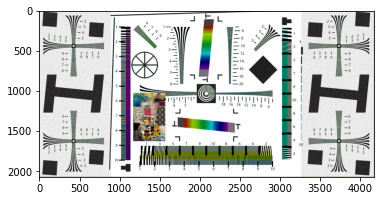

In [143]:
model1.get_demoscaled_image(calculation_time = True)

In [159]:
Image.fromarray(model1.calculated_img.astype('uint8'), mode='RGB').save('out.bmp')

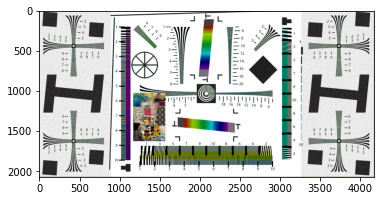

In [156]:
model1.show_img('result')

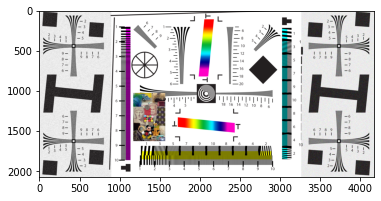

In [155]:
model1.show_img('original')

In [145]:
print(f"Mean squared error is: {model1.MSE()}")
print(f"PSNR metric is: {model1.PSNR()} db")

Mean squared error is: 722.3106008107167
PSNR metric is: 19.543563721465997 db


Как видим, разрешение изображения не изменилось, так как количество различимых полос осталось во всех местах таким же, как и на оригинальном изображении. Также можно заметить, что данный алгоритм некорректно отображает ярко-красные и ярко-фиолетовые цвета


# PPG

In [138]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import time
import warnings
warnings.filterwarnings("ignore")

class PPG:
  def __init__(self, path_to_original_img, path_to_cfa, path_to_rgb_cfa):

    self.path_to_original_img = path_to_original_img
    self.path_to_cfa = path_to_cfa
    self.path_to_rgb_cfa = path_to_rgb_cfa

    self.original_img = Image.open(path_to_original_img)
    self.cfa = Image.open(path_to_cfa)
    self.rgb_cfa = Image.open(path_to_rgb_cfa)

    self.calculated_img = None
    self.time_of_exec = None

  def get_demoscaled_image(self, calculation_time: bool):
    filter_img = np.array(self.rgb_cfa.convert('RGB'), dtype='int64')

    if calculation_time:
      start = time.time()

    img_r = filter_img[:, :, 0]
    img_g = filter_img[:, :, 1]
    img_b = filter_img[:, :, 2]
    img_br = img_r + img_b

    for i in tqdm(range(2, filter_img.shape[0] - 2)):
        for j in range(2, filter_img.shape[1] - 2):
            if self.get_color(i, j) != 'green':
              if self.get_color(i, j) == 'blue':
                img_g[i][j] = self.calculate_green(img_b[i-2:i+3, j-2:j+3].flatten(), img_g[i-2:i+3, j-2:j+3].flatten())
              elif self.get_color(i, j) == 'red':
                img_g[i][j] = self.calculate_green(img_r[i-2:i+3, j-2:j+3].flatten(), img_g[i-2:i+3, j-2:j+3].flatten())
                
    for i in tqdm(range(2, filter_img.shape[0] - 2)):
        for j in range(2, filter_img.shape[1] - 2):
            if self.get_color(i, j) == 'green':
                img_r[i][j], img_b[i][j] = self.calculate_blue_and_red(img_r[i-1:i+2, j-1:j+2].flatten(), img_g[i-1:i+2, j-1:j+2].flatten(), 
                                                             img_b[i-1:i+2, j-1:j+2].flatten(), self.get_color(i + 1, j))
                
    for i in tqdm(range(2, filter_img.shape[0] - 2)):
        for j in range(2, filter_img.shape[1] - 2):
            if self.get_color(i, j) != 'green':
                if self.get_color(i, j) != 'red':
                    img_r[i][j] = self.calculate_red_or_blue(img_br[i-2:i+3, j-2:j+3].flatten(), img_g[i-2:i+3, j-2:j+3].flatten())
                else:
                    img_b[i][j] = self.calculate_red_or_blue(img_br[i-2:i+3, j-2:j+3].flatten(), img_g[i-2:i+3, j-2:j+3].flatten())

    for y in tqdm(range(2, filter_img.shape[0])):
        for x in range(2, filter_img.shape[1]):
            filter_img[y][x][0] = img_r[y][x]
            filter_img[y][x][1] = img_g[y][x]
            filter_img[y][x][2] = img_b[y][x]

    self.calculated_img = filter_img

    if calculation_time:
      end = time.time()

    self.time_of_exec = (end-start)*10**3

    print("The time of execution of above program is :", (end-start)*10**3/(filter_img.shape[0] - 4)/(filter_img.shape[1] - 4), "ms/Mpix")  
    self.show_img('result')

  def MSE(self):
    if self.calculated_img is not None:
      return np.mean((self.calc_luminance(np.array(self.calculated_img)) - self.calc_luminance(np.array(self.original_img)))**2)
    else:
      raise ValueError('Calculate resulted image first!')

  def PSNR(self):
    if self.MSE() == 0:
      return 100
    else:
      max_pixel = 255
      return (10.0 * np.log10(max_pixel**2/self.MSE()))

  def get_color(self, i, j):
    if j % 2 == 0:
        if i % 2 == 0:
            return 'red'
        else:
            return 'green'
    else:
        if i % 2 == 0:
            return 'green'
        else:
            return 'blue'

  def show_img(self, path):
    if 'original' in path.lower(): 
      plt.imshow(self.original_img)
      plt.show()
    elif 'rgb' in path.lower(): 
      plt.imshow(self.rgb_cfa)
      plt.show()
    elif 'cfa' in path.lower():
      plt.imshow(self.cfa)
      plt.show()
    elif 'result' in path.lower():
      plt.imshow(self.calculated_img)
      plt.show()
    else:
      print('Nothing to show')

  def normalize_color(self, value):
      value = min(value, 255)
      return max(value, 0)

  def calc_luminance(self, img):
      return 0.2126 * img[:, :, 0] + 0.7152 * img[:, : , 1] + 0.0722 * img[:, :, 2]

  def calculate_green(self, rb_m, g_m):
      grad_N = abs(rb_m[12] - rb_m[2]) * 2 + abs(g_m[7] - g_m[17])
      grad_E = abs(rb_m[12] - rb_m[14]) * 2 + abs(g_m[11] - g_m[13])
      grad_W = abs(rb_m[12] - rb_m[10]) * 2 + abs(g_m[11] - g_m[13])
      grad_S = abs(rb_m[12] - rb_m[22]) * 2 + abs(g_m[7] - g_m[17])

      grads = np.array([grad_N, grad_E, grad_W, grad_S])
      min_idx = np.argmin(grads)

      if min_idx == 0:
          return self.normalize_color((g_m[7] * 3 + g_m[17] + rb_m[12] - rb_m[2]) / 4)
      elif min_idx == 1:
          return self.normalize_color((g_m[13] * 3 + g_m[11] + rb_m[12] - rb_m[14]) / 4)
      elif min_idx == 2:
          return self.normalize_color((g_m[11] * 3 + g_m[13] + rb_m[12] - rb_m[10]) / 4)
      elif min_idx == 3:
          return self.normalize_color((g_m[17] * 3 + g_m[7] + rb_m[12] - rb_m[22]) / 4)

  def calculate_blue_and_red(self, r_m, g_m, b_m, color):
      if color != 'blue':
          return self.normalize_color(self.hue_transit(g_m[1], g_m[4], g_m[7], r_m[1], r_m[7])), self.normalize_color(self.hue_transit(g_m[3], g_m[4], g_m[5], b_m[3], b_m[5]))
      else:
          return self.normalize_color(self.hue_transit(g_m[3], g_m[4], g_m[5], r_m[3], r_m[5])), self.normalize_color(self.hue_transit(g_m[1], g_m[4], g_m[7], b_m[1], b_m[7]))
      
  def calculate_red_or_blue(self, rb_m, g_m):
      grad_NE = abs(rb_m[8] - rb_m[16]) + abs(rb_m[4] - rb_m[12]) + abs(rb_m[12] - rb_m[20]) + abs(g_m[8] - g_m[12]) + \
          abs(g_m[12] - g_m[16]) 

      grad_NW = abs(rb_m[6] - rb_m[18]) + abs(rb_m[0] - rb_m[12]) + abs(rb_m[12] - rb_m[24]) + abs(g_m[6] - g_m[12]) + \
          abs(g_m[12] - g_m[18])

      if grad_NE < grad_NW:
          return self.normalize_color(self.hue_transit(g_m[8], g_m[12], g_m[16], rb_m[8], rb_m[16]))
      else:
          return self.normalize_color(self.hue_transit(g_m[6], g_m[12], g_m[18], rb_m[6], rb_m[18]))

  def hue_transit(self, L1, L2, L3, V1, V3):
    if ((L1 < L2) and  (L2 < L3)) or ((L1 > L2) and (L2 > L3)):
      return V1 + (V3- V1)*(L2 - L1)/(L3 - L1)
    else:
      return (V1 + V3)/2 + (L2 - (L1 + L3)/2)/2

In [139]:
model2 = PPG('./Задание 1/Original.bmp', './Задание 1/CFA.bmp', './Задание 1/RGB_CFA.bmp')

100%|██████████| 2071/2071 [00:16<00:00, 125.77it/s]


The time of execution of above program is : 0.02658263059938663 ms/Mpix


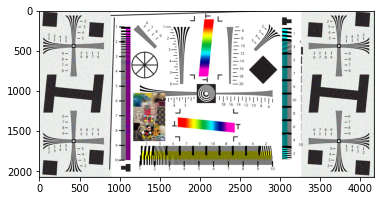

In [140]:
model2.get_demoscaled_image(calculation_time = True)

In [141]:
print(f"Mean squared error is: {model2.MSE()}")
print(f"PSNR metric is: {model2.PSNR()} db")

Mean squared error is: 561.193589283305
PSNR metric is: 20.63967659585693 db


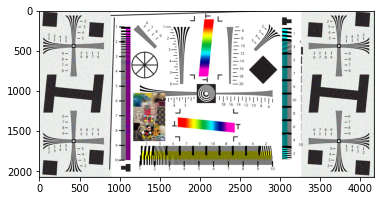

In [143]:
filtered_rgb = model2.calculated_img.astype('uint8')
restored = Image.fromarray(filtered_rgb, mode='RGB')
plt.imshow(restored)
plt.show()

Можем заметить, что данный алгоритм дает лучшее качество, корректно отображая проблемные участки прошлого алгоритма. При этом разрешение изображение остается на том же уровне.